In [3]:
import pandas as pd #importing pandas 
import numpy as np  #importing numpy
import matplotlib.pyplot as plt   #importing matplotlib
import scipy.stats as st   #importing stats
from sklearn.feature_selection import chi2  #importing chi2
from sklearn.ensemble import RandomForestClassifier  #importing randomforestclassifier

# Loan Classification

In [4]:
df=pd.read_csv('ml360datasets/loan_classification.csv') # loading the dataset

In [5]:
df['Gender']=df['Gender'].replace('#',np.nan) # replacing the special charater 
df['Gender']=df['Gender'].replace('?',np.nan) # replacing the special charater 

In [6]:
df['Gender']=df['Gender'].replace(np.nan,df['Gender'].mode()[0]) # Replacing the Null values
df['Married']=df['Married'].replace(np.nan,df['Married'].mode()[0]) # Replacing the Null values
df['Dependents']=df['Dependents'].replace(np.nan,df['Dependents'].mode()[0]) # Replacing the Null values
df['Self_Employed']=df['Self_Employed'].replace(np.nan,df['Self_Employed'].mode()[0]) # Replacing the Null values
df['Credit_History']=df['Credit_History'].replace(np.nan,df['Credit_History'].mode()[0]) # Replacing the Null values

In [7]:
df['LoanAmount']=df['LoanAmount'].replace(np.nan,df['LoanAmount'].mean()) # Replacing the Null values
df['Loan_Amount_Term']=df['Loan_Amount_Term'].replace(np.nan,df['Loan_Amount_Term'].mean()) # Replacing the Null values

In [8]:
df['Credit_History']=df['Credit_History'].astype('object') #chnaging the datatype
df.drop('Loan_ID',axis=1,inplace=True) #droping the loan id column

In [9]:
from sklearn.preprocessing import LabelEncoder   #importing labelencoder
le = LabelEncoder()  #giving the variable to labelencoder
for col in df.columns:  #for loop for getting coumns
    if (df[col].dtypes == "object"):  #checking for columns type if its object r not
        df[col] = df[col].astype(str)  
        df[col] = le.fit_transform(df[col])  #applying label encoder for category columns to convert to numerical

In [10]:
X=df.iloc[:,:-1] # defining X 
y=df['Loan_Status'] # defining y

Label Encoder

In [11]:
loan_chiscore=chi2(X,y) # doing chi square 

In [12]:
loan_pvalue=pd.Series(loan_chiscore[1],index = X.columns) # saving p values with variable 
loan_pvalue.sort_values(ascending = True , inplace = True) # sorting the p values

In [13]:
loan_pvalue[loan_pvalue<=0.05]  # choosing the p values which are less than greater than or equal to 0.05

CoapplicantIncome    0.000000e+00
ApplicantIncome      3.310429e-22
LoanAmount           3.802850e-10
Credit_History       3.403796e-07
dtype: float64

In [14]:
loan_fscore=pd.Series(loan_chiscore[0],index = X.columns) # saving Chi2 statistics with variable 
loan_fscore.sort_values(ascending = False , inplace = True)# sorting the Chi2 statistics

In [15]:
loan_fscore

CoapplicantIncome    11342.041603
ApplicantIncome         93.904964
LoanAmount              39.211545
Credit_History          26.005877
Education                3.540502
Loan_Amount_Term         3.267315
Married                  1.782425
Property_Area            0.377837
Dependents               0.085953
Gender                   0.036234
Self_Employed            0.007285
dtype: float64

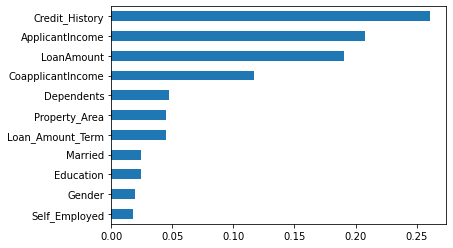

In [16]:
rf=RandomForestClassifier()  # importing the random forest 
rf.fit(X,y) #fitting the X and yy variables
loan_imp=pd.Series(rf.feature_importances_,index=X.columns) #creating a pandas series for feature importance 
loan_imp.sort_values(ascending=True).plot(kind='barh') # sorting them and ploting 
plt.show()

Get Dummies

In [17]:
X=pd.get_dummies(X) #getting dummies conerting categorical to numerical

In [18]:
loan_chiscore=chi2(X,y)  #applying chi2 

In [19]:
loan_pvalue=pd.Series(loan_chiscore[1],index = X.columns) # saving p values with variable 
loan_pvalue.sort_values(ascending = True , inplace = True) # sorting the p values

In [20]:
loan_pvalue[loan_pvalue<=0.05] 

CoapplicantIncome    0.000000e+00
ApplicantIncome      3.310429e-22
LoanAmount           3.802850e-10
Credit_History       3.403796e-07
dtype: float64

In [21]:
loan_fscore=pd.Series(loan_chiscore[0],index = X.columns) # saving Chi2 statistics with variable 
loan_fscore.sort_values(ascending = False , inplace = True)# sorting the Chi2 statistics

In [22]:
loan_fscore 

CoapplicantIncome    11342.041603
ApplicantIncome         93.904964
LoanAmount              39.211545
Credit_History          26.005877
Education                3.540502
Loan_Amount_Term         3.267315
Married                  1.782425
Property_Area            0.377837
Dependents               0.085953
Gender                   0.036234
Self_Employed            0.007285
dtype: float64

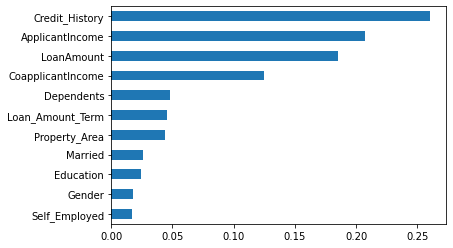

In [23]:
rf=RandomForestClassifier()  # importing the random forest 
rf.fit(X,y) #fitting the X and yy variables
loan_imp=pd.Series(rf.feature_importances_,index=X.columns) #creating a pandas series for feature importance 
loan_imp.sort_values(ascending=True).plot(kind='barh') # sorting them and ploting 
plt.show()

# Kc House

In [50]:
df1=pd.read_csv('ml360datasets/kc_house.csv') # loading the dataset

In [51]:
df1['bedrooms']=df1['bedrooms'].astype('object') # changing data type
df1['bathrooms']=df1['bathrooms'].astype('object') # changing data type
df1['floors']=df1['floors'].astype('object') # changing data type
df1['waterfront']=df1['waterfront'].astype('object') # changing data type
df1['view']=df1['view'].astype('object') # changing data type
df1['condition']=df1['condition'].astype('object') # changing data type
df1['grade']=df1['grade'].astype('object') # changing data type

In [9]:
from sklearn.preprocessing import LabelEncoder   #importing labelencoder
le = LabelEncoder()  #giving the variable to labelencoder
for col in df.columns:  #for loop for getting coumns
    if (df[col].dtypes == "object"):  #checking for columns type if its object r not
        df[col] = df[col].astype(str)  
        df[col] = le.fit_transform(df[col])  #applying label encoder for category columns to convert to numerical

In [53]:
X1=df1.drop(columns=['sqft_lot15','lat','long','id'],axis=1)# dropping the target variable and unnecessary columns
y1=df1['sqft_lot15'] #defing the y as target variable

Label Encoder

In [54]:
house_chiscore=chi2(X1,y1) # doing chi square 

In [55]:
house_pvalue=pd.Series(house_chiscore[1],index = X1.columns) # saving p values with variable 
house_pvalue.sort_values(ascending = True , inplace = True) # sorting the p values

In [56]:
house_pvalue[house_pvalue<=0.05]# choosing the p values which are less than greater than or equal to 0.05

price             0.000000e+00
sqft_living       0.000000e+00
sqft_lot          0.000000e+00
sqft_above        0.000000e+00
sqft_basement     0.000000e+00
yr_renovated      0.000000e+00
sqft_living15     0.000000e+00
view             5.754198e-133
bathrooms         1.131146e-38
waterfront        3.343265e-09
floors            1.545099e-06
dtype: float64

In [57]:
house_fscore=pd.Series(house_chiscore[0],index = X1.columns) #converting the chi score values in pandas series and giving 
#respective columns to the score
house_fscore.sort_values(ascending = False , inplace = True) #sorting the chi score values ascending 

In [58]:
pd.set_option('display.max_rows',None)
house_fscore

price            1.770936e+08
sqft_lot         1.231877e+08
yr_renovated     1.323017e+06
sqft_basement    5.711060e+05
sqft_above       3.866744e+05
sqft_living      3.657912e+05
sqft_living15    2.336243e+05
view             2.126318e+03
bathrooms        1.361631e+03
waterfront       9.910000e+02
floors           9.390891e+02
grade            5.154514e+02
yr_built         3.335441e+02
bedrooms         2.571822e+02
condition        1.344342e+02
zipcode          2.650579e+01
dtype: float64

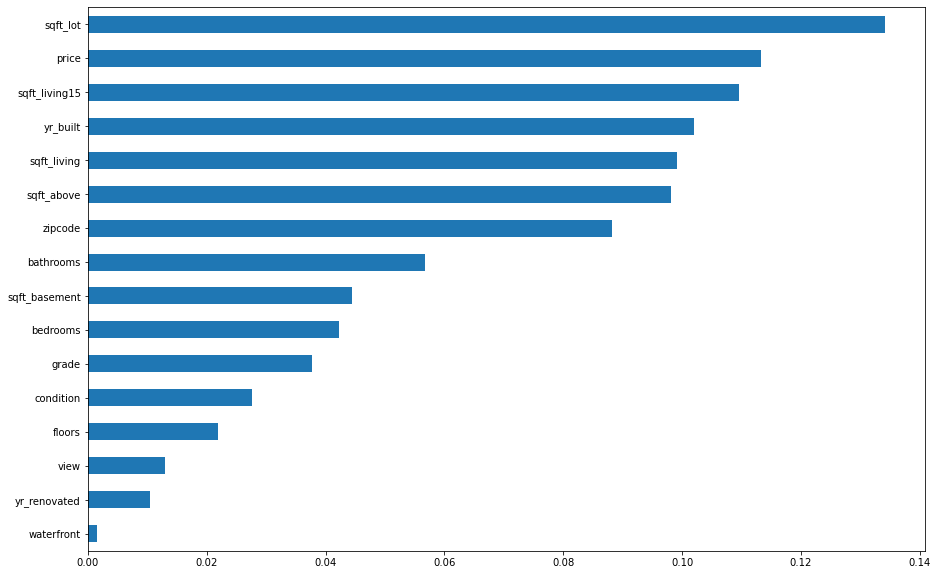

In [59]:
rf.fit(X1,y1)  #fiting the randomforest
house_imp=pd.Series(rf.feature_importances_,index=X1.columns)  # getting the important features fron random forest 
#in pandas series
house_imp.sort_values(ascending=True).plot(kind='barh',figsize=(15,10)) #sorting the values in ascending values 
plt.show()

Get Dummies

In [60]:
X1=pd.get_dummies(X1)  #getting dummies for X matrix 

In [61]:
house_chiscore=chi2(X1,y1) # doing chi square 

In [62]:
house_pvalue=pd.Series(house_chiscore[1],index = X1.columns) # saving p values with variable 
house_pvalue.sort_values(ascending = True , inplace = True) # sorting the p values

In [63]:
house_pvalue[house_pvalue<=0.05]# choosing the p values which are less than greater than or equal to 0.05

price             0.000000e+00
sqft_living       0.000000e+00
sqft_lot          0.000000e+00
sqft_above        0.000000e+00
sqft_basement     0.000000e+00
yr_renovated      0.000000e+00
sqft_living15     0.000000e+00
view             5.754198e-133
bathrooms         1.131146e-38
waterfront        3.343265e-09
floors            1.545099e-06
dtype: float64

In [64]:
house_fscore=pd.Series(house_chiscore[0],index = X1.columns)  #converting the chi score values in pandas series and giving 
#respective columns to the score
house_fscore.sort_values(ascending = False , inplace = True) #sorting the chi score values ascending 

In [65]:
pd.set_option('display.max_rows',None)
house_fscore

price            1.770936e+08
sqft_lot         1.231877e+08
yr_renovated     1.323017e+06
sqft_basement    5.711060e+05
sqft_above       3.866744e+05
sqft_living      3.657912e+05
sqft_living15    2.336243e+05
view             2.126318e+03
bathrooms        1.361631e+03
waterfront       9.910000e+02
floors           9.390891e+02
grade            5.154514e+02
yr_built         3.335441e+02
bedrooms         2.571822e+02
condition        1.344342e+02
zipcode          2.650579e+01
dtype: float64

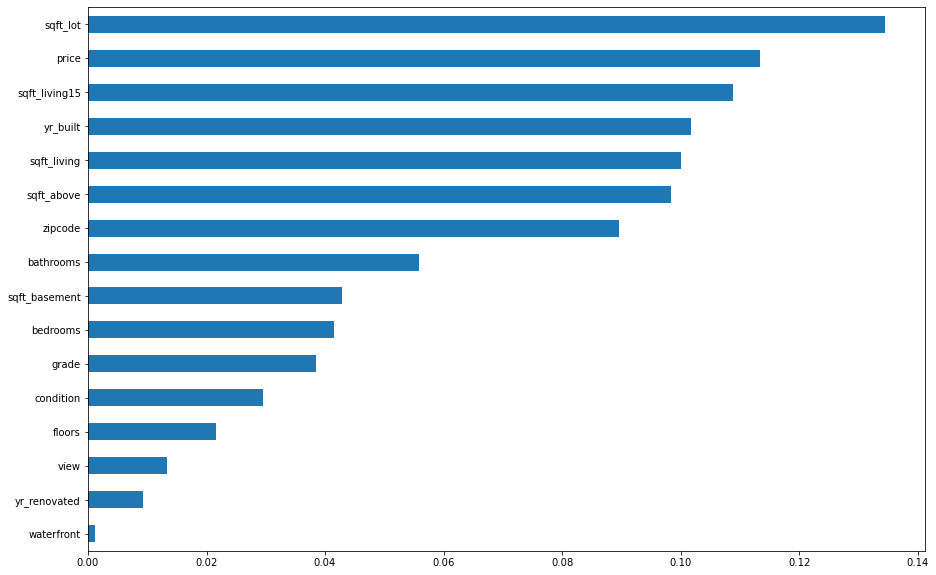

In [66]:
rf.fit(X1,y1)  #fiting the randomforest
house_imp=pd.Series(rf.feature_importances_,index=X1.columns) # getting the important features fron random forest 
#in pandas series
house_imp.sort_values(ascending=True).plot(kind='barh',figsize=(15,10))  #sorting the values in ascending values 
plt.show()

# Movie Classification

In [77]:
df2=pd.read_csv('ml360datasets/Movie_classification.csv') #reading the movie classification data

In [78]:
df2['Time_taken']=df2['Time_taken'].fillna(df2['Time_taken'].mean())  #replacing the null values with mean values

In [9]:
from sklearn.preprocessing import LabelEncoder   #importing labelencoder
le = LabelEncoder()  #giving the variable to labelencoder
for col in df.columns:  #for loop for getting coumns
    if (df[col].dtypes == "object"):  #checking for columns type if its object r not
        df[col] = df[col].astype(str)  
        df[col] = le.fit_transform(df[col])  #applying label encoder for category columns to convert to numerical

In [79]:
X2=df2.iloc[:,:-1]  #defing X matrix 
y2=df2['Start_Tech_Oscar']  # defing the target variable

Label Encoder

In [71]:
house_chiscore=chi2(X2,y2) # doing chi square 

In [72]:
house_pvalue=pd.Series(house_chiscore[1],index = X2.columns) # saving p values with variable 
house_pvalue.sort_values(ascending = True , inplace = True) # sorting the p values

In [73]:
house_pvalue[house_pvalue<=0.05]# choosing the p values which are less than greater than or equal to 0.05

Collection           0.000000e+00
Trailer_views        0.000000e+00
Budget               3.375694e-37
Twitter_hastags      1.749484e-29
Marketing expense    6.675744e-08
Time_taken           4.138442e-04
dtype: float64

In [74]:
house_fscore=pd.Series(house_chiscore[0],index = X2.columns) #storing the chi score values in pandas series
house_fscore.sort_values(ascending = False , inplace = True) #sorting them in ascending order

In [75]:
pd.set_option('display.max_rows',None)
house_fscore

Collection             90457.574008
Trailer_views          30620.842724
Budget                   162.404292
Twitter_hastags          127.119151
Marketing expense         29.156615
Time_taken                12.468627
Avg_age_actors             3.323642
3D_available               1.124134
Movie_length               0.747503
Production expense         0.732741
Genre                      0.627320
Num_multiplex              0.247155
Producer_rating            0.129195
Lead_Actress_rating        0.111678
Director_rating            0.090503
Lead_ Actor_Rating         0.087317
Multiplex coverage         0.000246
Critic_rating              0.000033
dtype: float64

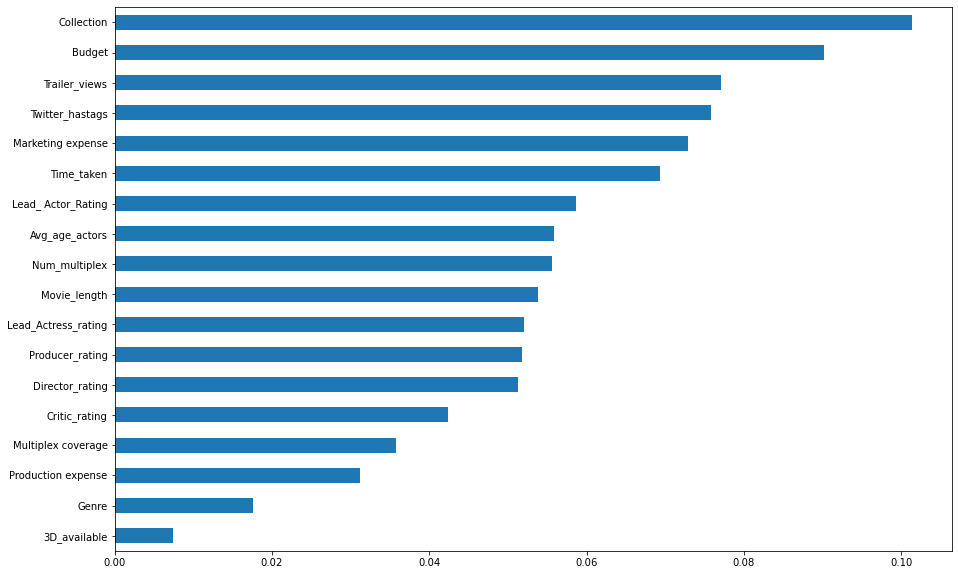

In [76]:
rf.fit(X2,y2) # fiting the random forest 
house_imp=pd.Series(rf.feature_importances_,index=X2.columns) #getting the important features from random forest
house_imp.sort_values(ascending=True).plot(kind='barh',figsize=(15,10)) #sorting them in ascending order
plt.show()

Get Dummies

In [80]:
X2=pd.get_dummies(X2) #getting dummies for categorical columns

In [81]:
movie_chiscore=chi2(X2,y2) #fitting the chi2 

In [82]:
movie_pvalue=pd.Series(movie_chiscore[1],index = X2.columns) # storing the p values
movie_pvalue.sort_values(ascending = True , inplace = True) #sorting them

In [83]:
movie_pvalue[movie_pvalue<=0.05]

Trailer_views        0.000000e+00
Collection           0.000000e+00
Budget               3.375694e-37
Twitter_hastags      1.749484e-29
Marketing expense    6.675744e-08
Time_taken           4.138442e-04
dtype: float64

In [84]:
movie_fscore=pd.Series(movie_chiscore[0],index = X2.columns) #storing chi score values
movie_fscore.sort_values(ascending = False , inplace = True) #sorting them ascending 

In [85]:
movie_fscore

Collection             90457.574008
Trailer_views          30620.842724
Budget                   162.404292
Twitter_hastags          127.119151
Marketing expense         29.156615
Time_taken                12.468627
Avg_age_actors             3.323642
Genre_Thriller             1.713843
Genre_Drama                1.542612
3D_available_NO            1.381645
3D_available_YES           1.124134
Movie_length               0.747503
Production expense         0.732741
Num_multiplex              0.247155
Genre_Comedy               0.156774
Producer_rating            0.129195
Lead_Actress_rating        0.111678
Director_rating            0.090503
Lead_ Actor_Rating         0.087317
Genre_Action               0.004225
Multiplex coverage         0.000246
Critic_rating              0.000033
dtype: float64

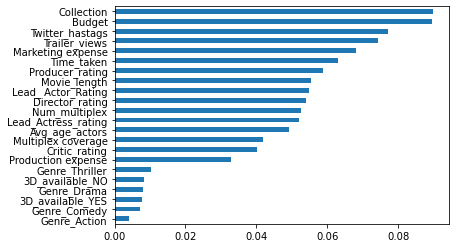

In [86]:
rf.fit(X2,y2) #fitting the random forest
movie_imp=pd.Series(rf.feature_importances_,index=X2.columns) #getting the important features from random forest
movie_imp.sort_values(ascending=True).plot(kind='barh') #sorting the values
plt.show()

# Wine Quality

In [98]:
df3=pd.read_csv('ml360datasets/winequality-white.csv')  #deffing the wine quality data

In [9]:
from sklearn.preprocessing import LabelEncoder   #importing labelencoder
le = LabelEncoder()  #giving the variable to labelencoder
for col in df.columns:  #for loop for getting coumns
    if (df[col].dtypes == "object"):  #checking for columns type if its object r not
        df[col] = df[col].astype(str)  
        df[col] = le.fit_transform(df[col])  #applying label encoder for category columns to convert to numerical

In [99]:
X3=df3.iloc[:,:-1] #storing the X matrix 
y3=df3['quality']  #storing the target variable

Label Encoder

In [90]:
house_chiscore=chi2(X3,y3) # doing chi square 

In [91]:
house_pvalue=pd.Series(house_chiscore[1],index = X3.columns) # saving p values with variable 
house_pvalue.sort_values(ascending = True , inplace = True) # sorting the p values

In [92]:
house_pvalue[house_pvalue<=0.05]# choosing the p values which are less than greater than or equal to 0.05

total sulfur dioxide     0.000000e+00
free sulfur dioxide     1.814960e-201
residual sugar          4.556308e-105
alcohol                  6.522316e-31
volatile acidity         4.943564e-02
dtype: float64

In [94]:
house_fscore=pd.Series(house_chiscore[0],index = X3.columns) #storing chi score values in pandas series
house_fscore.sort_values(ascending = False , inplace = True) #sorting the values

In [95]:
pd.set_option('display.max_rows',None)
house_fscore

total sulfur dioxide    3358.298433
free sulfur dioxide      947.712845
residual sugar           501.235224
alcohol                  155.078234
volatile acidity          12.622636
fixed acidity              7.922042
chlorides                  2.529005
citric acid                0.851118
sulphates                  0.579206
pH                         0.428745
density                    0.005065
dtype: float64

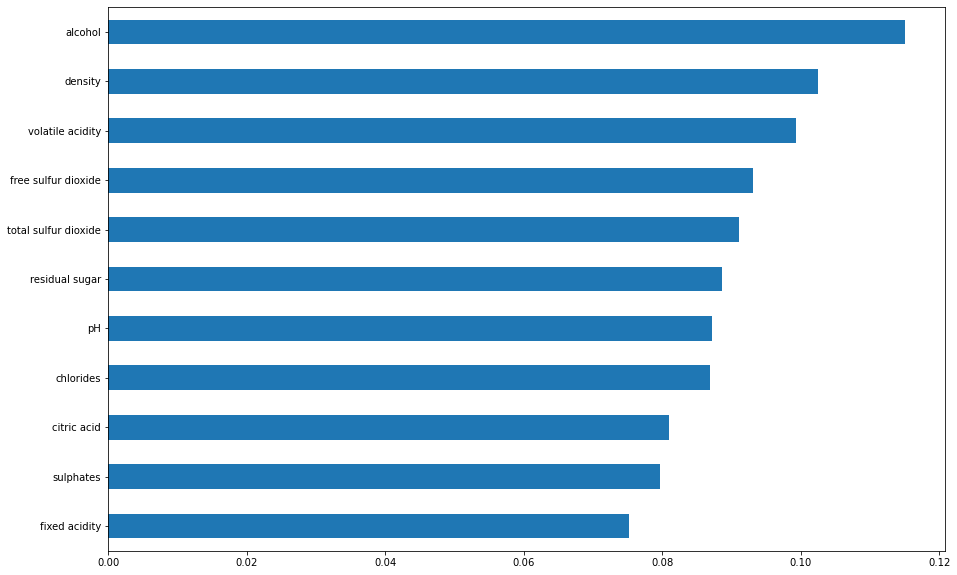

In [97]:
rf.fit(X3,y3) #fitting the random forest
house_imp=pd.Series(rf.feature_importances_,index=X3.columns) #getting important features from random forest
house_imp.sort_values(ascending=True).plot(kind='barh',figsize=(15,10)) #sorting the values
plt.show()

Get Dummies

In [100]:
X3=pd.get_dummies(X3)  #getting dummy values for categorical columns

In [101]:
wine_chiscore=chi2(X3,y3) #fitting chi2

In [102]:
wine_pvalue=pd.Series(wine_chiscore[1],index = X3.columns) #storing p values
wine_pvalue.sort_values(ascending = True , inplace = True) #sorting them

In [103]:
wine_pvalue[wine_pvalue<=0.10]

total sulfur dioxide     0.000000e+00
free sulfur dioxide     1.814960e-201
residual sugar          4.556308e-105
alcohol                  6.522316e-31
volatile acidity         4.943564e-02
dtype: float64

In [104]:
wine_fscore=pd.Series(wine_chiscore[0],index = X3.columns) #storing the chi score in pandas series 
wine_fscore.sort_values(ascending = False , inplace = True) #sorting the values

In [105]:
wine_fscore

total sulfur dioxide    3358.298433
free sulfur dioxide      947.712845
residual sugar           501.235224
alcohol                  155.078234
volatile acidity          12.622636
fixed acidity              7.922042
chlorides                  2.529005
citric acid                0.851118
sulphates                  0.579206
pH                         0.428745
density                    0.005065
dtype: float64

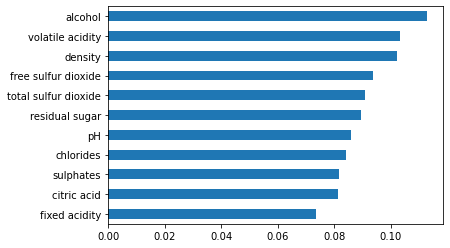

In [106]:
rf.fit(X3,y3) # fitting the random forest 
wine_imp=pd.Series(rf.feature_importances_,index=X3.columns) #getting the important features from random forest 
wine_imp.sort_values(ascending=True).plot(kind='barh') #sorting them
plt.show()